1) K NEAREST NEIGHBOR

In [598]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [599]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print(X_train.shape,X_test.shape,y)

(1257, 64) (540, 64) [0 1 2 ... 8 9 8]


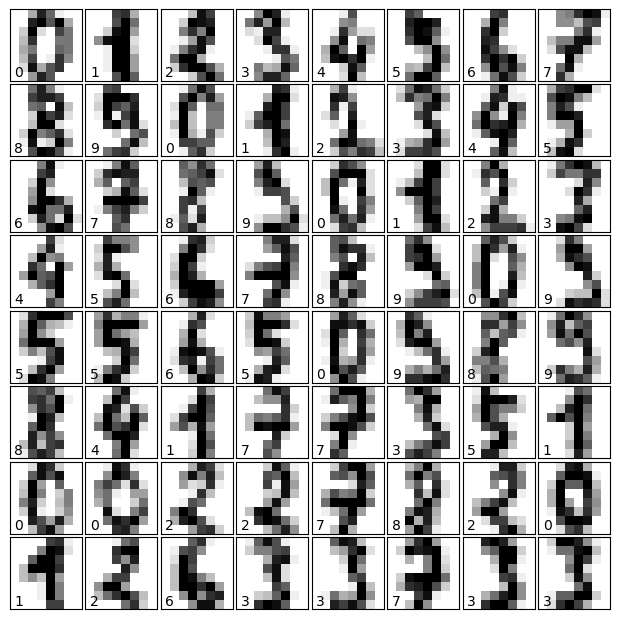

In [600]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range (64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],plt.cm.binary, interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

    

k= 1  Accuracy= 0.9851851851851852
k= 3  Accuracy= 0.9851851851851852
k= 5  Accuracy= 0.9833333333333333


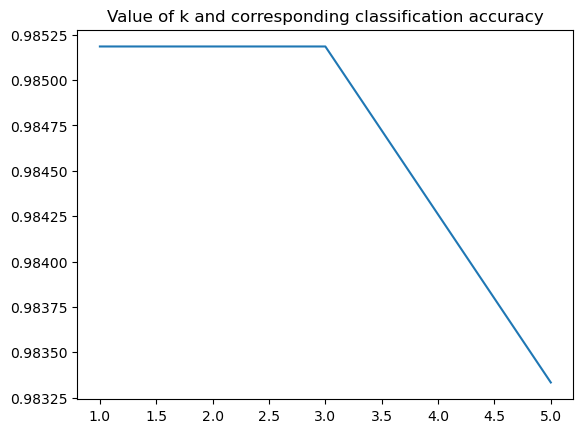

In [601]:
results = []

for i, k in enumerate([1,3,5]):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction == y_test, 1, 0).sum() / (len(y_test))
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])  # Storing the k,accuracy tuple in results array

k,accuracy = zip(*results)

plt.plot(k,accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()




2) LOGISTIC REGRESSION

In [602]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [603]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [604]:
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

In [605]:
X = df.drop(columns='Purchased')    #predictor
y = df['Purchased']                 #labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)

# variables with large p-values such as Parch, Fare and Embarked aren't relevant to prediction
print(logmodel.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.4494
Time:                        22:33:41   Log-Likelihood:                -100.15
converged:                       True   LL-Null:                       -181.90
Covariance Type:            nonrobust   LLR p-value:                 2.594e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -13.5196     39.647     -0.341      0.733     -91.226      64.187
User ID          1.338e-07   2.53e-06      0.053      0.958   -4.82e-06    5.09e-06
Gender             -0.1032      

In [606]:
predictions = logmodel.predict(sm.add_constant(X_test))  
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

print(accuracy_score(y_test, bin_predictions))

0.875


Text(0, 0.5, 'True Positive Rate')

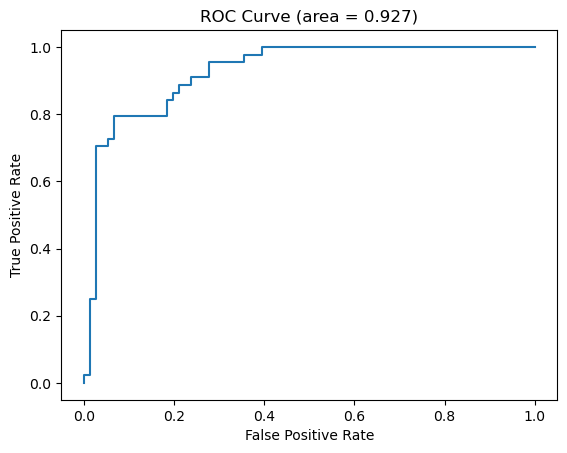

In [607]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [608]:
class LogisticRegression:

    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights,
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Step 3: Compute the@ cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true *
                                              np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]


In [609]:
from sklearn.preprocessing import StandardScaler
y_train = y_train.values.reshape(-1, 1)

#must rescale in order to fit in the logistic class
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
weights, bias, costs = log_reg.train(X_train_scaled, y_train, n_iters=100, learning_rate=0.01)
y_pred = log_reg.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

Cost after iteration 0: 0.6931471805599453
0.8583333333333333


Logit = 0.875, python code = 0.853

Text(0, 0.5, 'True Positive Rate')

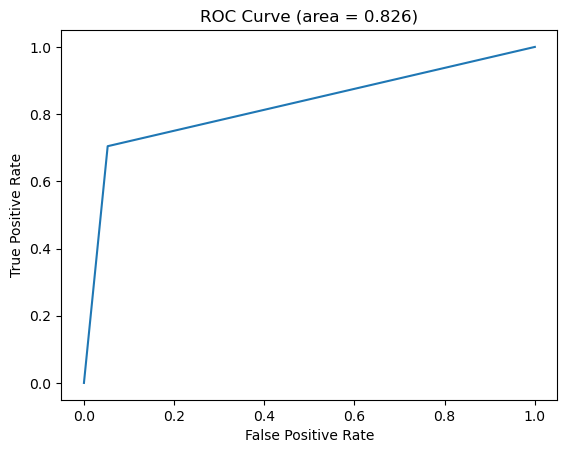

In [610]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


3) LINEAR DISCRIMINANT FUNCTIONS FOR CLASSIFICATION

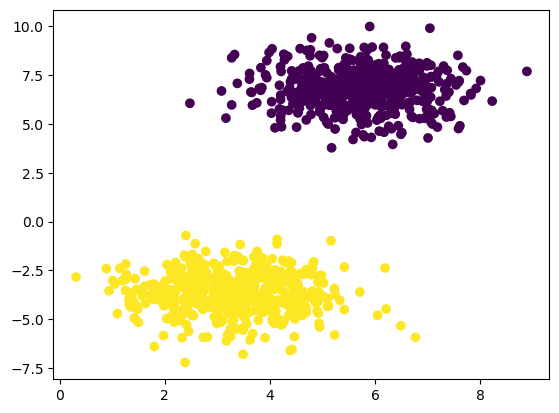

In [611]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

In [612]:
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

> Least-Squares solution

1.0


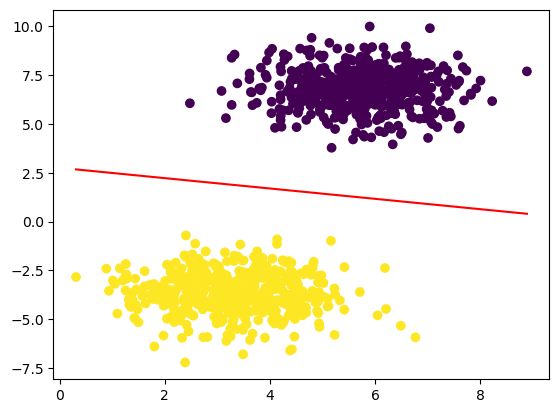

In [613]:
def LS(X_train,X_test, y_train, y_test):
    aug_train = np.ones((X_train.shape[0], 1))
    X_train_aug = np.concatenate((aug_train, X_train), axis=1) #augment the inputs
    T = np.hstack((1 - y_train, y_train))  #one hot encode the targets
    weights = np.linalg.inv(X_train_aug.T @ X_train_aug)@ X_train_aug.T @ T

    aug_test = np.ones((X_test.shape[0], 1))
    X_test_aug = np.concatenate((aug_test, X_test), axis=1) #augment the inputs (test)

    y_pred = [1 if x > 0.5 else 0 for x in y_test]
    print(accuracy_score(y_test, y_pred))

    slope = -(weights[1,0] - weights[1,1])/(weights[2,0] - weights[2,1])
    intercept = -(weights[0,0] - weights[0,1])/(weights[2,0] - weights[2,1])
    return slope, intercept


slope, intercept = LS(X_train, X_test, y_train, y_test)
plt.scatter(X[:, 0], X[:, 1], c=y)
x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_hyperplane = slope * x_hyperplane + intercept
plt.plot(x_hyperplane, y_hyperplane, 'r')
plt.show()


1.0


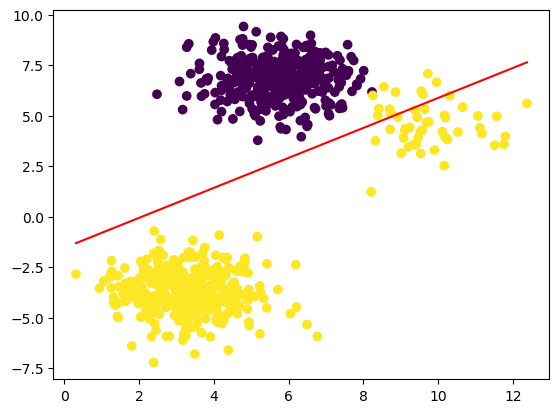

In [614]:

X_extra, _ = make_blobs(n_samples=50, centers=1, n_features=2)#50 new blob
y_extra = np.ones((50, 1))#add the points to class 1

X_train = np.vstack((X_train, X_extra))#add the extra points to the dataset
y_train = np.vstack((y_train, y_extra))

slope, intercept = LS(X_train, X_test, y_train, y_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel())
x_hyperplane = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_hyperplane = slope * x_hyperplane + intercept
plt.plot(x_hyperplane, y_hyperplane, 'r')
plt.show()


Adding the outliers caused the boundaries to move a lot, there can be a better predictor.

>FISHER'S LINEAR DISCRIMINANT(FLD)

1.0


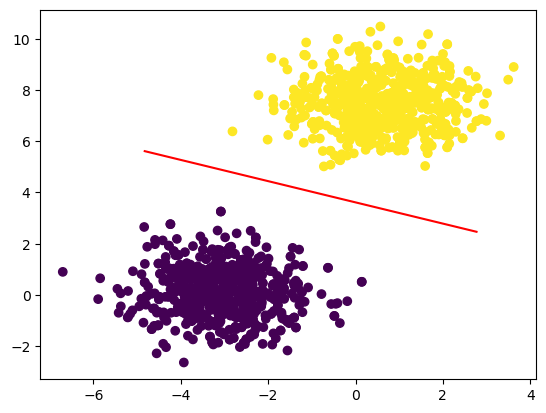

In [615]:
X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:,0], X[:,1], c=y)
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

m1 = np.mean(X_train[y_train.ravel() == 0], axis=0) #mean vector
m2 = np.mean(X_train[y_train.ravel() == 1], axis=0)

SW = (X_train[y_train.ravel() == 0] - m1).T @ (X_train[y_train.ravel() == 0] - m1) + \
     (X_train[y_train.ravel() == 1] -
      m2).T @ (X_train[y_train.ravel() == 1] - m2)
w = np.linalg.inv(SW) @ (m2-m1)

y_proj = X_test @ w  #projection in the direction of w
thr = np.mean(y_proj)   #treshold

y_pred = [1 if x > thr else 0 for x in y_proj]

print(accuracy_score(y_test, y_pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = (-w[0]/w[1]) * x_hyperplane + thr/w[1]
plt.plot(x_hyperplane, y_hyperplane, 'r')
plt.show()


4) PERCEPTRON

In [616]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape
        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias
            # Step 2: Compute the output
            y_predict = self.step_function(a)
            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)
            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b
        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:,
                                                               np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

Training Prediction:  1.0
Test Prediction:  1.0


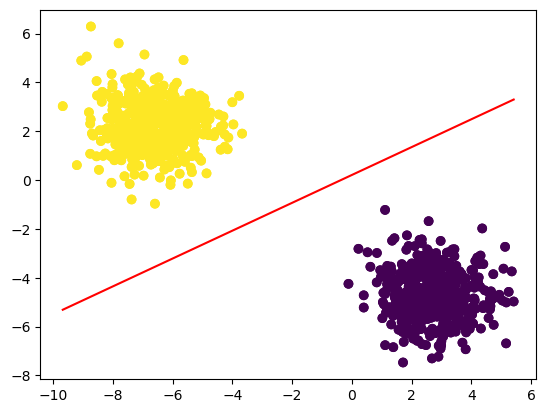

In [617]:
X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

p = Perceptron()
p.train(X_train,y_train, 0.05, 500)

y_train_pred = p.predict(X_train)
y_test_pred = p.predict(X_test)

print("Training Prediction: ",accuracy_score(y_train_pred,y_train))
print("Test Prediction: ",accuracy_score(y_test_pred,y_test))

plt.scatter(X[:, 0], X[:, 1], c=y.ravel())
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = - (p.weights[0] / p.weights[1]) * x_values - p.bias / p.weights[1]
plt.plot(x_values, y_values, 'r')
plt.show()
